## 1. In vivo Table T2 CoV MAPE

In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
import sys

# Get the current working directory (from where the notebook is running)
current_dir = os.getcwd()

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(project_root)


from utils.qmri_utils import *
from utils.ada_utils import *


t2map_dir = 'recon_1mm_t2map_prior'
t2feta_csv = compute_t2_per_tissue_feta(t2map_dir)
print(t2feta_csv)
t2feta_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_feta.tsv', sep='\t', index=False)


ModuleNotFoundError: No module named 'utils'

# 3. IMPORT T2 MAPS/RECONSTRUCTION/FETA/JHU/HO MAPS & LABELS

In [2]:
from dcm_utils import csv2df
from qmri_utils import *
from ada_utils import *


#0.55  Tesla
bids_path = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/'
csv_path = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/dicom/logs/'
t2map_dir = "recon_1mm_t2map"

# PRJ-004
csvs = ['2024083017_17510000.csv', # Emeline ses-01
        '2024090320_55420000.csv', # Misha ses-01
        '2024090618_37050000.csv', # Alyssa ses-01
        '2024090811_14320000.csv', # Rizhong ses-01
        '2024091017_53530000_1.csv', # Misha ses-03
        '2024091017_53530000_2.csv', # Misha ses-04
        '2024091020_45220000.csv', # Yasser ses-01
        '2024091320_23400000.csv', # Alyssa ses-03
        '2024091321_22550000.csv', # Michael ses-01
        '2024091322_27490000.csv', # Felice ses-01
        '2024092720_10110000.csv', # Nataliia ses-01
        '2024092719_10310000.csv', # Andreea ses-01
        '2024102120_48480000.csv' # Jaime ses-01
        ]

# Import metadata from logs
for i,csv in enumerate(csvs):
    if i==0:
        metadata = csv2df(os.path.join(csv_path,csv))
    else:
        metadata = pd.concat([metadata,csv2df(os.path.join(csv_path,csv))], ignore_index=True)

# Import maps
t2map, t2recon, jhu, ho, feta = import_maps_as_dict(metadata, bids_path,t2map_dir)
# dict keys: sub, ses, te for recon, val: data array

# Get labels name and index
labels_ho, labels_jhu, labels_feta = get_labels_as_dict()
# dict keys: index, name

# Get T2 per ROI - intersection between FETA & JHU/HO labels + erode by 3
t2ho, t2jhu, t2ho_csv, t2jhu_csv= get_t2_per_roi(t2map,feta,ho,labels_ho,jhu,labels_jhu)
# dict keys: name, data,n_data, mean, median, std
t2ho_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_ho.tsv', sep='\t', index=False)
t2jhu_csv.to_csv('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/t2_jhu.tsv', sep='\t', index=False)

*************** Import Maps ****************
sub-002_ses-01
/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map/sub-002/ses-01/anat
t2map:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_sim-0_t2map_ada-gauss.nii.gz
feta : /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_feta/sub-002/ses-01/anat/sub-002_ses-01_te-114_recon_1mm_feta.nii.gz
jhu label:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_jhu/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_jhu.nii.gz
ho_label:  /home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_ho/sub-002/ses-01/anat/sub-002_ses-01_recon_1mm_ho.nii.gz
/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-002/ses-01/anat/sub-002_ses-01_te-114_recon_1mm.nii.gz
/home/mroulet/Documents/Data/qMRI/

/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mroulet/miniconda3/envs/gomar/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


sub-003 ses-01
sub-003 ses-03
sub-003 ses-04
sub-004 ses-01
sub-004 ses-03
sub-005 ses-01
sub-006 ses-01
sub-007 ses-01
sub-008 ses-01
sub-009 ses-01
sub-010 ses-01
sub-011 ses-01


In [19]:
t2ho['sub-002']['ses-01'][1].keys()

dict_keys(['name', 'data', 'n_data', 'mean', 'median', 'std'])

In [27]:
sub = 'sub-011'
ses = 'ses-01'
t2 = t2jhu
for index, data in t2[sub][ses].items():
    stat = []
    for sub in ['sub-002','sub-003','sub-004','sub-005','sub-006','sub-007','sub-008','sub-009','sub-010','sub-011']:
        for ses in t2[sub].keys():
            
            stat.append(t2[sub][ses][index]['n_data'])
    
    print(index,"\t", stat, "\t\t", data["name"])


1 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Unclassified
2 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Middle cerebellar peduncle
3 	 [2067, 3121, 3036, 2956, 1958, 1920, 2957, 1371, 1993, 2388, 2144, 2296, 1910] 		 Pontine crossing tract (a part of MCP)
4 	 [531, 2752, 2625, 2596, 1945, 1844, 1713, 2045, 2293, 2197, 2887, 2288, 2156] 		 Genu of corpus callosum
5 	 [3815, 4785, 4810, 4792, 2029, 2034, 4149, 2312, 2558, 2852, 3936, 3946, 4011] 		 Body of corpus callosum
6 	 [0, 22, 2, 4, 0, 1, 7, 0, 2, 3, 0, 0, 0] 		 Splenium of corpus callosum
7 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Fornix (column and body of fornix)
8 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Corticospinal tract R
9 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Corticospinal tract L
10 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Medial lemniscus R
11 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Medial lemniscus L
12 	 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 		 Inferior cerebellar peduncle R  
13 	 [0, 0,

### 3. Fig 1 - Methods - In Vitro T2 decay 

White Matter
MEAN COV: 0.4566858594859115
MEAN COV: 0.8377770760707832
MEAN COV: 5.237366230595843
RUN vs SES ANALYSIS
T-statistic: 75.0
P-value: 0.005023345351219177
a=0.001 3.7037037037037037e-05
a=0.05 0.001851851851851852
a=0.01 0.00037037037037037035
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.


SES vs SUB COV ANALYSIS
T-statistic: 729.0
P-value: 3.030868359795783e-10
REJECT the null hypothesis: There is a significant difference between the means of the two samples.




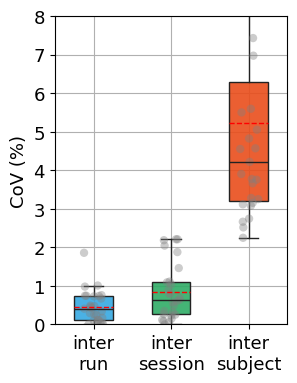

Cortical Gray Matter
{'name': 'Frontal Pole', 'data': array([161.68224, 145.35524, 152.48288, ..., 227.04192, 404.63324,
       397.44366], dtype=float32), 'n_data': 3501, 'mean': 176.19473, 'median': 169.85709, 'std': 35.2712} Frontal Pole
{'name': 'Superior Frontal Gyrus', 'data': array([191.63275 , 175.649   , 140.50746 , 156.94804 , 153.64252 ,
       162.18465 , 156.93352 , 159.95027 , 208.47458 , 177.84778 ,
       225.01666 , 170.82764 , 188.42735 , 185.06792 , 177.5319  ,
       162.5184  , 330.81308 , 319.1798  , 277.38406 , 155.06482 ,
       249.86517 , 155.44904 , 164.10846 , 208.72546 , 160.81226 ,
       168.21008 , 281.58258 , 164.42073 , 225.25131 , 157.42885 ,
       203.26483 , 258.8932  , 158.88095 , 190.0665  , 159.076   ,
       173.66853 , 151.16844 , 162.73709 , 171.36986 , 158.54266 ,
       219.63684 , 154.51543 , 207.83035 , 163.62906 , 209.46347 ,
       171.27647 , 191.38849 , 166.18187 , 159.09604 , 170.79298 ,
       168.50375 , 136.07088 , 134.57758 , 137

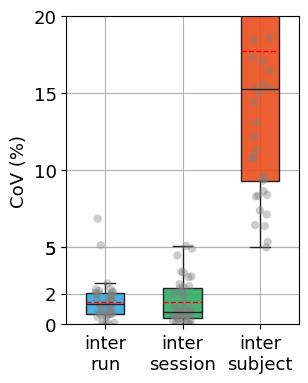

In [3]:
wm_lst = [3,4,5,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,41,42,45,46]
gm_lst = [1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,48]

plot_cov_boxplot(t2jhu,t2ho,wm_lst, gm_lst)

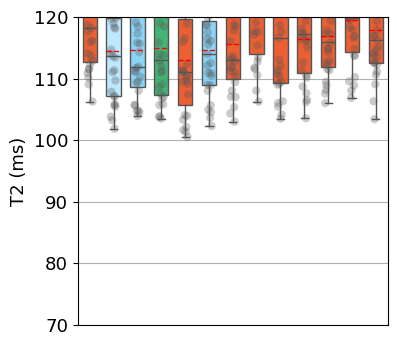

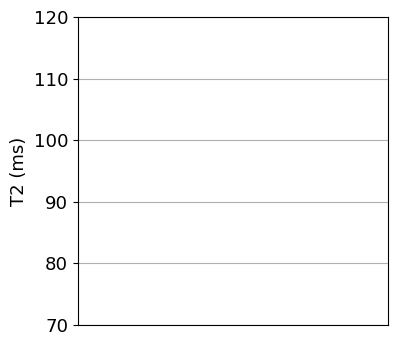

In [4]:
#plot_t2_boxplot(t2jhu,t2ho,wm_lst, gm_lst)

## BOXPLOT COMPARING WM /GM inter-run/ses/sub
 # Define the pattern to match text within parentheses
pattern = r'\([^)]*\)'

stat = {}
for t2,tissuetype,tiss_list, lim,j in zip([t2jhu,t2ho],["White Matter","Cortical Gray Matter"],[wm_lst,gm_lst], [[70,120],[70,120]],[1,2]):
    pos = 0
    xtickpos = []

    # Create a 4-subplot layout
    fig, axs = plt.subplots(figsize=(4,4))
    if tissuetype == "White Matter":
        facecolors= ['#5ab6b1','#5ab6b1','#5ab6b1','#5ab6b1','#5ab6b1','#5ab6b1']
    else:
        facecolors = ['#1e4747','#1e4747','#1e4747','#1e4747','#1e4747','#1e4747']
    
    facecolors = ['#b6e6ff','#7fd0f7','#36a9e1','#1d71b8','#2fac66','#e94e1b']
    facecolors = ['#e94e1b','#b6e6ff','#7fd0f7','#2fac66','#e94e1b','#7fd0f7','#e94e1b','#e94e1b','#e94e1b','#e94e1b','#e94e1b','#e94e1b','#e94e1b']

    if tissuetype not in stat.keys():
        stat[tissuetype] = {}
    #stat[tissuetype] = {}
    for (sub,ses),i in zip([['sub-002','ses-01'],
                            ['sub-003','ses-03'],
                            ['sub-003','ses-04'],
                            ['sub-003','ses-01'],
                            ['sub-004','ses-01'],
                            ['sub-004','ses-03'],
                            ['sub-005','ses-01'],
                            ['sub-006','ses-01'],
                            ['sub-007','ses-01'],
                            ['sub-008','ses-01'],
                            ['sub-009','ses-01'],
                            ['sub-010','ses-01'],
                            ['sub-011','ses-01'],
                            ],range(13)):
        
        if sub not in stat[tissuetype].keys():
            stat[tissuetype][sub] = {}

        mean_t2 = []
        median_t2 = []
        pos += 1
        xtickpos.append(pos)

        for index in tiss_list:
            mean_t2.append(t2[sub][ses][index]["mean"])
            median_t2.append(t2[sub][ses][index]["median"])
        
        mean_t2 = [x for x in mean_t2 if not np.isnan(x)]
        median_t2 = [x for x in median_t2 if not np.isnan(x)]

        stat[tissuetype][sub][ses] = mean_t2
        #stat[tissuetype][sub][ses] = median_t2

        # Generate random x-values for scatter plot
        random_x = np.random.rand(len(mean_t2)) * 2 + 1  # Random x-values between 1 and 3

        #box = plt.boxplot(CoV_interrun, labels=['CV'])
        boxcol= '#555555'
        bplot = plt.boxplot(mean_t2, positions = [pos], showfliers=False,
                                widths=0.6,patch_artist=True,boxprops=dict(edgecolor=boxcol, facecolor= (*mcolors.hex2color(facecolors[i]),0.9)),
                                whiskerprops=dict(color=boxcol),medianprops=dict(color=boxcol),
                                capprops=dict(color=boxcol), meanline=True,showmeans=True,meanprops=dict(color='red'))

        # Calculate the range for random x-values
        box_x = [item.get_xdata() for item in bplot['whiskers']]
        box_width = box_x[1][1] - box_x[0][1]  # Width of the boxplot
        center_x = (box_x[0][1] + box_x[1][1]) / 2  # Center x-coordinate of the boxplot
        x_min = pos - 0.5 / 4  # Minimum x-value for random_x
        x_max = pos + 0.5 / 4  # Maximum x-value for random_x

        # Generate random x-values for scatter plot
        random_x = np.random.uniform(x_min, x_max, len(mean_t2))

        # Plot scatter plot of all points
        plt.scatter(random_x, mean_t2, alpha=0.3, color=boxcol,edgecolors='none',zorder=2)


    #plt.ylabel('T2 (ms)')
    #plt.title(f'T2 of {tissuetype}')
    plt.grid('on',zorder=0)
    plt.ylim(lim)
    plt.ylabel("T2 (ms)",fontsize=13)
    plt.xticks([])
    plt.yticks(fontsize=13)
    plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/t2_{str(j)}_repeat.pdf')
    plt.show()



In [14]:
# wilcoxon,ks_2samp, ttest_ind, f_oneway,  ttest_rel,mannwhitneyu, friedmanchisquare, shapiro
# T2 test and ANOVA
for tissuetype,tiss_lst in zip(stat.keys(),[wm_lst,gm_lst]):

    print(tissuetype)
    print('a=0.001',0.001 / len(tiss_lst))
    print('a=0.05',0.05 / len(tiss_lst))
    print('a=0.01',0.01 / len(tiss_lst))

    # Run statistical test inter-run
    # Perform independent t-test
    t_statistic, p_value = f_oneway(stat[tissuetype]['sub-003']['ses-03'],stat[tissuetype]['sub-003']['ses-04'])
    t_statistic, p_value = mannwhitneyu(stat[tissuetype]['sub-003']['ses-03'],stat[tissuetype]['sub-003']['ses-04'])
    n = len(tiss_lst)
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-RUN ANALYSIS")
    #print(stat[tissuetype]['sub-002']['ses-01'])
    #print(stat[tissuetype]['sub-002']['ses-02'])
    print("WILCOXON: T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")

    # Run statistical test inter-session
    # Perform independent t-test
    t_statistic, p_value = mannwhitneyu(stat[tissuetype]['sub-003']['ses-01'],stat[tissuetype]['sub-003']['ses-04'])
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-SESSION ANALYSIS")
    #print(np.median(stat[tissuetype]['sub-002']['ses-01']))
    #print(np.median(stat[tissuetype]['sub-002']['ses-02']))
    print("WILCOXON: T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")


    # Run statistical test inter-subject
    # Perform independent t-test
    #mean_stat_sub1 = [(x + y + z )/ 3 for x, y, z in zip(stat[tissuetype]['sub-003']['ses-01'], stat[tissuetype]['sub-004']['ses-01'],stat[tissuetype]['sub-005']['ses-01'])]
    t_statistic, p_value = kruskal(stat[tissuetype]['sub-003']['ses-01'],
                                    stat[tissuetype]['sub-004']['ses-01'],
                                    stat[tissuetype]['sub-005']['ses-01'],
                                    stat[tissuetype]['sub-006']['ses-01'],
                                    stat[tissuetype]['sub-007']['ses-01'],
                                    stat[tissuetype]['sub-008']['ses-01'],
                                    stat[tissuetype]['sub-002']['ses-01'])
    t_statistic, p_value = mannwhitneyu(stat[tissuetype]['sub-003']['ses-01'],stat[tissuetype]['sub-005']['ses-01'])
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-SUBJECT ANALYSIS")
    #print(mean_stat_sub1)
    print("ANOVA: T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")

White Matter
a=0.001 3.4482758620689657e-05
a=0.05 0.001724137931034483
a=0.01 0.0003448275862068966
INTER-RUN ANALYSIS
WILCOXON: T-statistic: 456.0 P-value: 0.5862382121741706 Effect size 0.04994054696789536
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.

INTER-SESSION ANALYSIS
WILCOXON: T-statistic: 322.0 P-value: 0.12750193693988535 Effect size -0.26872770511296074
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.

INTER-SUBJECT ANALYSIS
ANOVA: T-statistic: 174.0 P-value: 0.0003733852427522793 Effect size -0.6206896551724138
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.

Cortical Gray Matter
a=0.001 2.4390243902439026e-05
a=0.05 0.0012195121951219512
a=0.01 0.00024390243902439024
INTER-RUN ANALYSIS
WILCOXON: T-statistic: 951.0 P-value: 0.3076613684113011 Effect size 0.10707911957168352
DO NOT REJECT the n

In [12]:
import numpy as np
from scipy.stats import kruskal

# Sample data for three independent groups
group1 = np.array([10, 12, 14, 15, 16])
group2 = np.array([20, 22, 23, 24, 25])
group3 = np.array([30, 32, 31, 34, 35])

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(group1, group2, group3)

print(f"Kruskal-Wallis H statistic: {statistic}, p-value: {p_value}")


Kruskal-Wallis H statistic: 12.5, p-value: 0.0019304541362277095


In [13]:
# wilcoxon,ks_2samp, ttest_ind, f_oneway,  ttest_rel,mannwhitneyu, friedmanchisquare, shapiro
# T2 test and ANOVA
for tissuetype,tiss_lst in zip(stat.keys(),[wm_lst,gm_lst]):

    print(tissuetype)
    print('a=0.001',0.001 / len(tiss_lst))
    print('a=0.05',0.05 / len(tiss_lst))
    print('a=0.01',0.01 / len(tiss_lst))

    # Run statistical test inter-run
    # Perform independent t-test
    t_statistic, p_value = f_oneway(stat[tissuetype]['sub-003']['ses-03'],stat[tissuetype]['sub-003']['ses-04'])
    t_statistic, p_value = wilcoxon(stat[tissuetype]['sub-003']['ses-03'],stat[tissuetype]['sub-003']['ses-04'])
    n = len(tiss_lst)
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-RUN ANALYSIS")
    #print(stat[tissuetype]['sub-002']['ses-01'])
    #print(stat[tissuetype]['sub-002']['ses-02'])
    print("T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")

    # Run statistical test inter-session
    # Perform independent t-test
    t_statistic, p_value = wilcoxon(stat[tissuetype]['sub-003']['ses-01'],stat[tissuetype]['sub-003']['ses-04'])
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-SESSION ANALYSIS")
    #print(np.median(stat[tissuetype]['sub-002']['ses-01']))
    #print(np.median(stat[tissuetype]['sub-002']['ses-02']))
    print("T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")


    # Run statistical test inter-subject
    # Perform independent t-test
    #mean_stat_sub1 = [(x + y + z )/ 3 for x, y, z in zip(stat[tissuetype]['sub-003']['ses-01'], stat[tissuetype]['sub-004']['ses-01'],stat[tissuetype]['sub-005']['ses-01'])]
    t_statistic, p_value = f_oneway(t2['sub-002']['ses-01'][],
                                    stat[tissuetype]['sub-003']['ses-01'],
                                    stat[tissuetype]['sub-004']['ses-01'],
                                    stat[tissuetype]['sub-005']['ses-01'],
                                    stat[tissuetype]['sub-005']['ses-01'])
    r = (t_statistic - n * (n + 1) / 2) / (n**2 / 2)

    # Print the results
    print("INTER-SUBJECT ANALYSIS")
    #print(mean_stat_sub1)
    print("T-statistic:", t_statistic,"P-value:",p_value,'Effect size',r)

    # Interpret the results
    alpha = 0.001 / len (tiss_lst)
    if p_value < alpha:
        print("REJECT the null hypothesis: There is a significant difference between the means of the two samples.\n")
    else:
        print("DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.\n")

White Matter
a=0.001 3.4482758620689657e-05
a=0.05 0.001724137931034483
a=0.01 0.0003448275862068966
INTER-RUN ANALYSIS
T-statistic: 44.0 P-value: 5.336105823516846e-05 Effect size -0.929845422116528
DO NOT REJECT the null hypothesis: There is no significant difference between the means of the two samples.

INTER-SESSION ANALYSIS
T-statistic: 0.0 P-value: 3.725290298461914e-09 Effect size -1.0344827586206897
REJECT the null hypothesis: There is a significant difference between the means of the two samples.

INTER-SUBJECT ANALYSIS
T-statistic: 20.0 P-value: 1.3820827007293701e-06 Effect size -0.9869203329369798
REJECT the null hypothesis: There is a significant difference between the means of the two samples.

Cortical Gray Matter
a=0.001 2.4390243902439026e-05
a=0.05 0.0012195121951219512
a=0.01 0.00024390243902439024
INTER-RUN ANALYSIS
T-statistic: 172.0 P-value: 0.0005380795382734505 Effect size -0.8197501487209994
DO NOT REJECT the null hypothesis: There is no significant difference

In [36]:
stat = {}
for (sub,ses), acq  in metadata.groupby(["sub","ses"]):
    if sub not in stat.keys():
        stat[sub] = {}
    stat[sub][ses] = {}

    for tissue,tissue_lst in zip(['wm','gm'],[wm_lst,gm_lst]):
        t2 = t2jhu if tissue == 'wm' else t2ho
        roi_mean = []
        for index in tissue_lst:
            roi_mean.append(t2[sub][ses][index]['mean'])

        stat[sub][ses][tissue] = roi_mean

    print(stat['sub-003']['ses-04'][tissue])
    print(stat['sub-003']['ses-03'][tissue])
    print(stat['sub-003']['ses-01'][tissue])
    print(len(stat['sub-003']['ses-01'][tissue]))

[106.43299, 108.53043, 105.45747, 107.3641, 96.41114, 103.22699, 96.94253, 106.79559, 95.13151, 101.143745, 103.93242, 104.14048, 100.07753, 105.702484, 105.469315, 108.182205, 104.49203, 100.58398, 109.6968, 106.29812, 100.75576, 105.368, 107.24495, 98.03458, 109.23685, 105.16936, 104.12955, 98.4698, 101.079445, 100.00433, 104.29542, 108.56853, 106.956474, 101.114235, 110.6165, 104.48607, 102.361305, 99.272606, 104.119705, 100.81199, 94.23205]
[107.23431, 109.574776, 105.83758, 108.44163, 96.13477, 104.75838, 98.61262, 107.32925, 95.41336, 101.07655, 103.0901, 103.68092, 100.66349, 104.45278, 108.24982, 113.025085, 106.21025, 102.851234, 110.52766, 107.780464, 102.66291, 103.31841, 106.055916, 96.17348, 109.48155, 106.20418, 105.93166, 99.45414, 102.305954, 106.78734, 104.111336, 108.90597, 108.13089, 102.80216, 109.925644, 103.604904, 104.72203, 101.851425, 105.229, 101.37398, 101.48626]
[103.4977, 106.187706, 102.69447, 105.88057, 97.54626, 98.75422, 97.418976, 104.40895, 93.98462, 

(27, 2)
(27, 2)
0.9870078025945354 2.251177193532637e-21


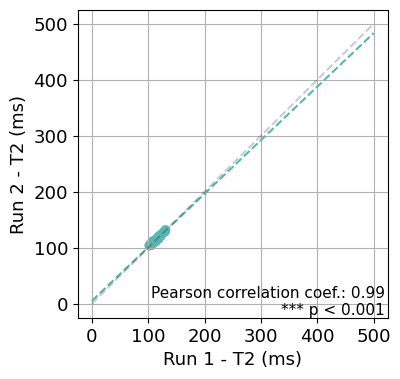

(41, 2)
(41, 2)
0.9651106819916959 2.6413184647715795e-24


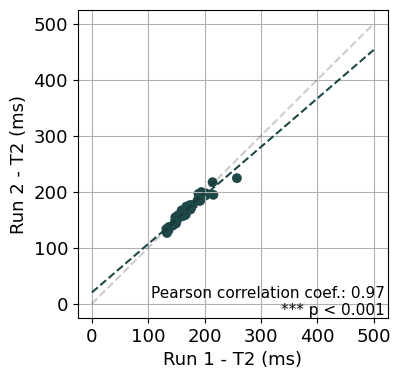

(27, 2)
(27, 2)
0.9705773988647652 5.643457295388404e-17


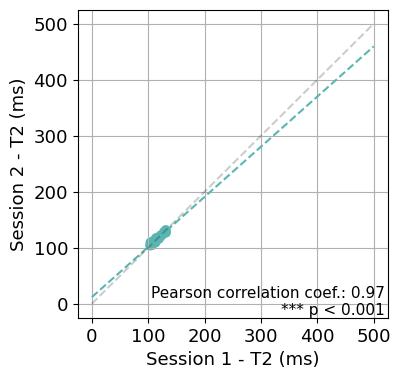

(41, 2)
(41, 2)
0.9396074944170137 9.308343535919814e-20


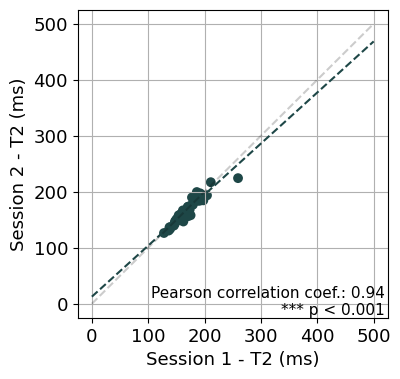

(27, 2)
(27, 2)
0.6983779738160423 5.101103148404419e-05


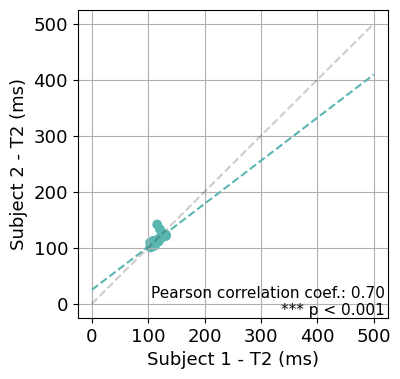

(41, 2)
(41, 2)
0.9083383328372773 2.391104500747675e-16


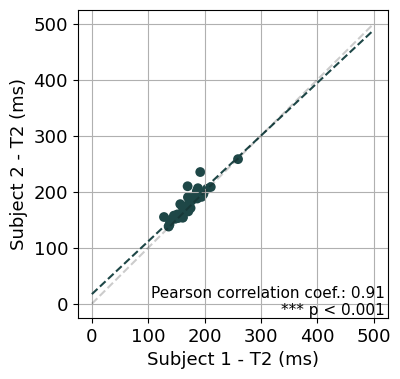

In [9]:
## Regression LINE
## INTER-RUN ###################################################################################
k = 0
 # Define the pattern to match text within parentheses
pattern = r'\([^)]*\)'
colors = ['#5ab6b1','#1e4747']
stat = {}
for t2,tissue_lst,tissuetype,lim,tisscolor in zip([t2jhu,t2ho],[wm_lst,gm_lst],["White Matter","Cortical Gray Matter"],[[70,100],[90,120]],colors):
    k+=1
    data_x_std = []
    data_y_std = []
    data_x_mean = []
    data_y_mean = []

    for index in tissue_lst:
        data_x_mean.append(t2['sub-003']['ses-03'][index]["mean"])
        data_x_std.append(t2['sub-003']['ses-03'][index]["std"])

    for index in tissue_lst:
        data_y_mean.append(t2['sub-003']['ses-04'][index]["mean"])
        data_y_std.append(t2['sub-003']['ses-04'][index]["std"])

    data_mean = np.stack((data_x_mean, data_y_mean), axis=1)
    data_std = np.stack((data_x_std, data_y_std), axis=1)

    # Find rows containing NaN
    nan_rows = np.isnan(data_mean).any(axis=1)

    # Filter out rows containing NaN
    data_mean = data_mean[~nan_rows]
    data_std = data_std[~nan_rows]

    print(data_std.shape)
    print(data_mean.shape)

    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_mean[:,0],data_mean[:,1])
    print(r_value, p_value)
    line_x = np.array([0,500])
    line_y = slope * line_x + intercept

    # Create scatter plot with error bars
    plt.figure(figsize=(4, 4))

    #for i in range(len(data_std)):
    #    plt.errorbar(data_mean[i,0], data_mean[i,1], xerr=data_std[i,0], yerr=data_std[i,1], fmt='o', markersize=10, color='#555555', ecolor='gray', capsize=5)

    plt.scatter(data_mean[:,0], data_mean[:,1], color=tisscolor, marker='o', s=50, edgecolor='none',alpha=1)

    # Plot regression line
    plt.plot(line_x, line_y, color=tisscolor, linestyle='--', label='Regression Line')
    plt.plot([0,500],[0,500],color = 'black',linestyle = '--', alpha= 0.2)

    # Add labels and title
    plt.xlabel('Run 1 - T2 (ms)',fontsize=13)
    plt.ylabel('Run 2 - T2 (ms)',fontsize=13)
    #plt.title('Inter-Session')
    #plt.xlim(lim)
    #plt.ylim(lim)

    # Add Pearson correlation coefficient and p-value to the plot
    #plt.text(0.1, 0.9, f'Pearson correlation coefficient: {r_value:.2f}\nP-value: {p_value:.4f}', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.99, 0.01, f'Pearson correlation coef.: {r_value:.2f}\n*** p < 0.001', transform=plt.gca().transAxes, fontsize=11,horizontalalignment='right')

    # Add legend
    #plt.legend(loc='lower right')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    # Show plot
    plt.grid(True,zorder=0)
    plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/reg_{str(k)}.pdf')
    plt.show()

## INTER-SESSION ###################################################################################

 # Define the pattern to match text within parentheses
pattern = r'\([^)]*\)'
colors = ['#5ab6b1','#1e4747']
stat = {}
for t2,tissue_lst,tissuetype,lim,tisscolor in zip([t2jhu,t2ho],[wm_lst,gm_lst],["White Matter","Cortical Gray Matter"],[[70,100],[90,120]],colors):
    k+=1
    data_x_std = []
    data_y_std = []
    data_x_mean = []
    data_y_mean = []

    for index in tissue_lst:
        data_x_mean.append(t2['sub-003']['ses-01'][index]["mean"])
        data_x_std.append(t2['sub-003']['ses-01'][index]["std"])

    for index in tissue_lst:
        data_y_mean.append(t2['sub-003']['ses-04'][index]["mean"])
        data_y_std.append(t2['sub-003']['ses-04'][index]["std"])

    data_mean = np.stack((data_x_mean, data_y_mean), axis=1)
    data_std = np.stack((data_x_std, data_y_std), axis=1)

    # Find rows containing NaN
    nan_rows = np.isnan(data_mean).any(axis=1)

    # Filter out rows containing NaN
    data_mean = data_mean[~nan_rows]
    data_std = data_std[~nan_rows]

    print(data_std.shape)
    print(data_mean.shape)

    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_mean[:,0],data_mean[:,1])
    print(r_value, p_value)
    line_x = np.array([0,500])
    line_y = slope * line_x + intercept

    # Create scatter plot with error bars
    plt.figure(figsize=(4,4))

    #for i in range(len(data_std)):
    #    plt.errorbar(data_mean[i,0], data_mean[i,1], xerr=data_std[i,0], yerr=data_std[i,1], fmt='o', markersize=10, color='#555555', ecolor='gray', capsize=5)

    plt.scatter(data_mean[:,0], data_mean[:,1], color=tisscolor, marker='o', s=50, edgecolor='none',alpha=1)

    # Plot regression line
    plt.plot(line_x, line_y, color=tisscolor, linestyle='--', label='Regression Line')
    plt.plot([0,500],[0,500],color = 'black',linestyle = '--', alpha= 0.2)

    # Add labels and title
    plt.xlabel('Session 1 - T2 (ms)',fontsize=13)
    plt.ylabel('Session 2 - T2 (ms)',fontsize=13)
    #plt.title('Inter-Subject')
    #plt.xlim(lim)
    #plt.ylim(lim)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    # Add Pearson correlation coefficient and p-value to the plot
    #plt.text(0.1, 0.9, f'Pearson correlation coefficient: {r_value:.2f}\nP-value: {p_value:.4f}', transform=plt.gca().transAxes, fontsize=10)
    if tissuetype == "White Matter":
        plt.text(0.99, 0.01, f'Pearson correlation coef.: {r_value:.2f}\n*** p < 0.001', transform=plt.gca().transAxes, fontsize=11,horizontalalignment='right')
    else:
        plt.text(0.99, 0.01, f'Pearson correlation coef.: {r_value:.2f}\n*** p < 0.001', transform=plt.gca().transAxes, fontsize=11,horizontalalignment='right')

    # Add legend
    #plt.legend(loc='lower right')

    # Show plot
    plt.grid(True,zorder=0)
    plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/reg_{str(k)}.pdf')
    plt.show()



## INTER-SUBJECT ###################################################################################

 # Define the pattern to match text within parentheses
pattern = r'\([^)]*\)'
colors = ['#5ab6b1','#1e4747']
stat = {}
for t2,tissue_lst,tissuetype,lim,tisscolor in zip([t2jhu,t2ho],[wm_lst,gm_lst],["White Matter","Cortical Gray Matter"],[[70,100],[90,120]],colors):
    k+=1
    data_x_std = []
    data_y_std = []
    data_x_mean = []
    data_y_mean = []

    for index in tissue_lst:
        data_x_mean.append(t2['sub-003']['ses-01'][index]["mean"])
        data_x_std.append(t2['sub-003']['ses-01'][index]["std"])

    for index in tissue_lst:
        data_y_mean.append(t2['sub-004']['ses-01'][index]["mean"])
        data_y_std.append(t2['sub-004']['ses-01'][index]["std"])

    data_mean = np.stack((data_x_mean, data_y_mean), axis=1)
    data_std = np.stack((data_x_std, data_y_std), axis=1)

    # Find rows containing NaN
    nan_rows = np.isnan(data_mean).any(axis=1)

    # Filter out rows containing NaN
    data_mean = data_mean[~nan_rows]
    data_std = data_std[~nan_rows]

    print(data_std.shape)
    print(data_mean.shape)

    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data_mean[:,0],data_mean[:,1])
    print(r_value, p_value)
    line_x = np.array([0,500])
    line_y = slope * line_x + intercept

    # Create scatter plot with error bars
    plt.figure(figsize=(4,4))

    #for i in range(len(data_std)):
    #    plt.errorbar(data_mean[i,0], data_mean[i,1], xerr=data_std[i,0], yerr=data_std[i,1], fmt='o', markersize=10, color='#555555', ecolor='gray', capsize=5)

    plt.scatter(data_mean[:,0], data_mean[:,1], color=tisscolor, marker='o', s=50, edgecolor='none',alpha=1)

    # Plot regression line
    plt.plot(line_x, line_y, color=tisscolor, linestyle='--', label='Regression Line')
    plt.plot([0,500],[0,500],color = 'black',linestyle = '--', alpha= 0.2)

    # Add labels and title
    plt.xlabel('Subject 1 - T2 (ms)',fontsize=13)
    plt.ylabel('Subject 2 - T2 (ms)',fontsize=13)
    #plt.title('Inter-Subject')
    #plt.xlim(lim)
    #plt.ylim(lim)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    # Add Pearson correlation coefficient and p-value to the plot
    #plt.text(0.1, 0.9, f'Pearson correlation coefficient: {r_value:.2f}\nP-value: {p_value:.4f}', transform=plt.gca().transAxes, fontsize=10)
    if tissuetype == "White Matter":
        plt.text(0.99, 0.01, f'Pearson correlation coef.: {r_value:.2f}\n*** p < 0.001', transform=plt.gca().transAxes, fontsize=11,horizontalalignment='right')
    else:
        plt.text(0.99, 0.01, f'Pearson correlation coef.: {r_value:.2f}\n*** p < 0.001', transform=plt.gca().transAxes, fontsize=11,horizontalalignment='right')

    # Add legend
    #plt.legend(loc='lower right')

    # Show plot
    plt.grid(True,zorder=0)
    plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/reg_{str(k)}.pdf')
    plt.show()



Processing sub-002 for T2...
Processing sub-003 for T2...
Processing sub-004 for T2...
Processing sub-005 for T2...
Processing sub-006 for T2...
Processing sub-007 for T2...
Processing sub-008 for T2...
Processing sub-009 for T2...
Processing sub-010 for T2...
Processing sub-011 for T2...
Processing sub-002 for T2...
Processing sub-003 for T2...
Processing sub-004 for T2...
Processing sub-005 for T2...
Processing sub-006 for T2...
Processing sub-007 for T2...
Processing sub-008 for T2...
Processing sub-009 for T2...
Processing sub-010 for T2...
Processing sub-011 for T2...
dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


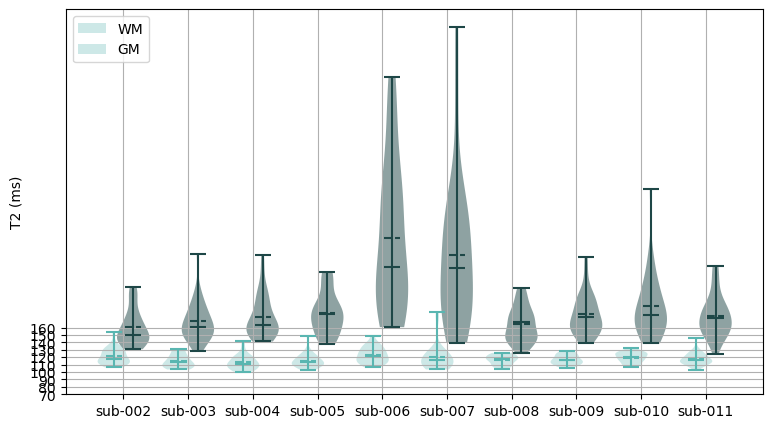

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Number of subjects and colors for WM and GM
subjects = 10
colors = ['#5ab6b1', '#1e4747']  # Color for WM and GM

# List of T2 datasets
t2s = [t2jhu, t2ho]  # Assuming t2jhu (WM) and t2ho (GM) are defined
roi_data = {}

# Collect mean values for each subject for both WM and GM
for t2 in t2s:
    for sub in ['sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011']:
        data = []
        print(f"Processing {sub} for T2...")
        for index in wm_lst:
            mean_value = t2[sub]['ses-01'][index]["mean"]
            if np.isnan(mean_value):
                print(f"Warning: NaN found for {sub}, ROI {index}.")
            else:
                data.append(mean_value)
        roi_data.setdefault(sub, []).append(data)  # Store data for the subject

# Organizing data for the violin plot
data_for_plot = [[roi_data[sub][0] for sub in roi_data], [roi_data[sub][1] for sub in roi_data]]

# Creating a violin plot
plt.figure(figsize=(9, 5))
positions = np.arange(1, subjects + 1)

# Plot WM data
parts_wm = plt.violinplot(data_for_plot[0], positions=positions - 0.15, showmeans=True, showmedians=True)
# Plot GM data
parts_gm = plt.violinplot(data_for_plot[1], positions=positions + 0.15, showmeans=True, showmedians=True)
print(parts_wm.keys())
# Formatting the plot
plt.xticks(positions, roi_data.keys())  # Keep the original x-ticks
plt.yticks([70,80,90,100,110,120,130,140,150,160])
plt.ylabel('T2 (ms)')

# Set colors for WM and GM
for pc in parts_wm['bodies']:
    pc.set_facecolor(colors[0])  # WM color
    pc.set_alpha(0.3)

for pc in parts_gm['bodies']:
    pc.set_facecolor(colors[1])  # GM color
    pc.set_alpha(0.5)


parts_gm['cmedians'].set_color(colors[1])  # GM mean color
parts_wm['cmedians'].set_color(colors[0])  # WM mean color
parts_gm['cbars'].set_color(colors[1])  # GM mean color
parts_wm['cbars'].set_color(colors[0])  # WM mean color
parts_gm['cmins'].set_color(colors[1])  # GM mean color
parts_wm['cmins'].set_color(colors[0])  # WM mean color
parts_gm['cmaxes'].set_color(colors[1])  # GM mean color
parts_wm['cmaxes'].set_color(colors[0])  # WM mean color
parts_gm['cmeans'].set_color(colors[1])  # GM mean color
parts_gm['cmeans'].set_linestyle('--')  # Set mean line style to dashed
parts_wm['cmeans'].set_color(colors[0])  # GM mean color
parts_wm['cmeans'].set_linestyle('--')  # Set mean line style to dashed



plt.grid()
plt.legend(['WM', 'GM'], loc='upper left', frameon=True)
plt.savefig(f'/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/violin.pdf')
plt.show()


# COLORSCALE T2 & RESIDUALS MAPS

In [60]:
## NOT IN USE

import numpy as np
from cmcrameri import cm

def color_log_remap(ori_cmap, lo_lev, up_lev):
    """
    color_log_remap: lookup of the original color map table according to a "log-like" curve.
    The log-like curve contains a linear part and a logarithmic part; the size of the parts
    depends on the range (lo_lev, up_lev).

    Arguments:
        ori_cmap: original colormap, provided as an Nx3 matrix
        lo_lev: lower level of the range to be displayed
        up_lev: upper level of the range to be displayed

    Returns:
        modified colormap
    """
    assert up_lev > 0, "upper level must be positive"
    assert up_lev > lo_lev, "upper level must be larger than lower level"

    map_length = ori_cmap.shape[0]
    e_inv = np.exp(-1.0)
    a_val = e_inv * up_lev
    m_val = max(a_val, lo_lev)
    
    # This is to ensure that the value is slightly above 1/map_length
    b_val = (1.0 / map_length) + (a_val >= lo_lev) * ((a_val - lo_lev) / (2 * a_val - lo_lev))
    b_val += 1e-7

    # Initialize logCmap with zeros, and assign the first row as oriCmap's first row
    log_cmap = np.zeros_like(ori_cmap)
    log_cmap[0, :] = ori_cmap[0, :]

    # Logarithmic portion factor
    log_portion = 1.0 / (np.log(m_val) - np.log(up_lev))

    # Compute the remapped colormap
    for g in range(1, map_length):
        f = 0.0
        x = g * (up_lev - lo_lev) / map_length + lo_lev
        
        if x > m_val:
            # Logarithmic segment of the curve
            f = map_length * ((np.log(m_val) - np.log(x)) * log_portion * (1 - b_val) + b_val)
        else:
            if lo_lev < a_val and x > lo_lev:
                # Linear segment of the curve
                f = map_length * ((x - lo_lev) / (a_val - lo_lev) * (b_val - (1.0 / map_length))) + 1.0
            elif x <= lo_lev:
                # Lowest valid color
                f = 1.0
        
        # Lookup from the original colormap
        log_cmap[g, :] = ori_cmap[min(map_length - 1, int(np.floor(f))), :]

    return log_cmap

# Define a helper function to sample the colormap into an Nx3 array
def sample_cmap(cmap,N=256):
    """Sample a colormap (cmap) into an Nx3 array."""
    return cmap(np.linspace(0, 1, N))[:, :3]  # Get only RGB values, dropping any alpha channel

# Use the colormap 'navia' from cmcrameri
log_navia = color_log_remap(sample_cmap(cm.navia, N=256),0,200)  # Convert to Nx3 array


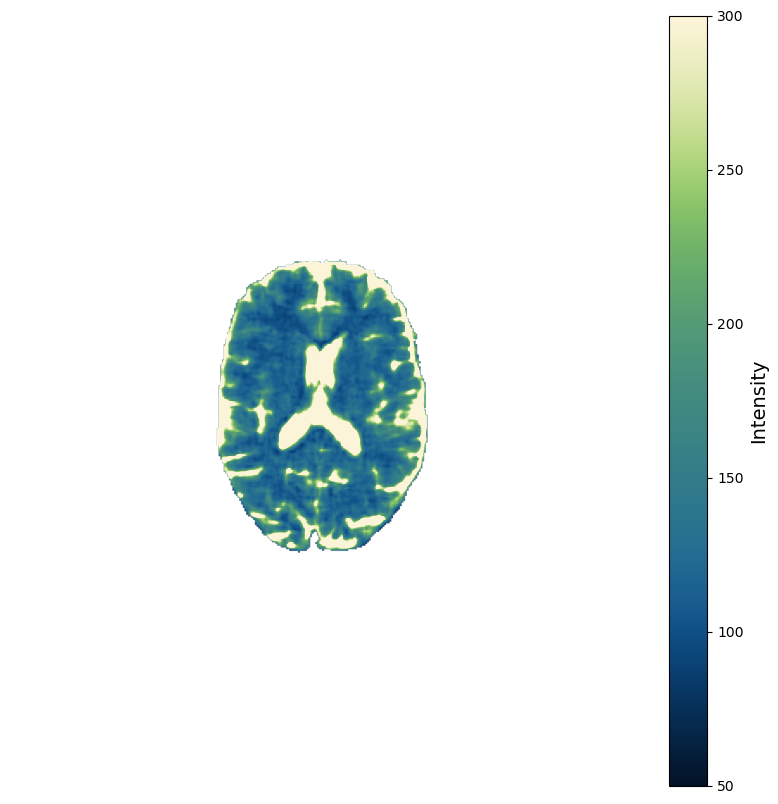

In [24]:
from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

""" x = np.linspace(0, 100, 100)[None, :]
plt.imshow(x, aspect='auto', cmap=cm.navia) # or any other colourmap
plt.axis('off') """

sub = 'sub-011'
ses = 'ses-01'
slice_index ={'sub-002':90,
              'sub-003':120,
              'sub-004':115,
              'sub-005':105,
              'sub-006':105,
              'sub-007':105,
              'sub-008':100,
              'sub-009':108,
              'sub-010':115,
              'sub-011':120}
flnm = f"/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_t2map/{sub}/{ses}/anat/{sub}_{ses}_recon_1mm_sim-0_t2map_ada-gauss.nii.gz"
img_array = sitk.GetArrayFromImage(sitk.ReadImage(flnm))
slice_data = img_array[slice_index[sub],:, :]

alpha = np.ones(slice_data.shape)
alpha[slice_data == 0] = 0

plt.figure(figsize=(10, 10)) 
#im= plt.imshow(slice_data, cmap=plt.cm.colors.ListedColormap(log_navia), origin='lower',vmin=0,vmax=200,alpha=alpha) # initial 40 - 250
im= plt.imshow(slice_data, cmap=cm.navia, origin='lower',vmin=50,vmax=300,alpha=alpha) # initial 40 - 250
#plt.title(f'{sub} - slice {slice_index[sub]}')
plt.axis('off')  # Turn off the axis

cbar = plt.colorbar(im)
cbar.set_label('Intensity', fontsize=14) 
plt.show()



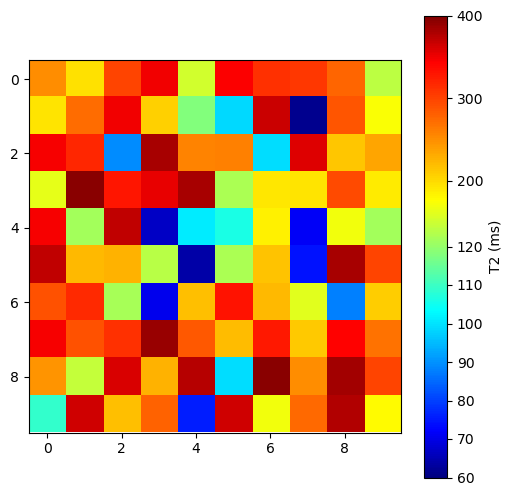

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import interp1d

# Define the colors and their positions along the colormap (standard jet colormap)
colors = [
    (0, '#000080'),    # Navy blue at 0 (dark)
    (0.1, '#0000ff'),  # Blue at 0.1
    (0.36, '#00ffff'), # Cyan at 0.36
    (0.6, '#ffff00'),  # Yellow at 0.6
    (0.9, '#ff0000'),  # Red at 0.9
    (1, '#800000')     # Maroon at 1
]

# Create the custom colormap similar to 'jet'
custom_cmap = LinearSegmentedColormap.from_list('jet', colors)

# Define the control points for the curve-based contrast adjustment
control_x = np.array([60, 120, 400])   # x-values (intensity range)
control_y = np.array([0, 0.5, 1])      # y-values (mapped positions in colormap)

# Create a mapping function using interpolation (linear for this case)
mapping_function = interp1d(control_x, control_y, kind='linear', fill_value="extrapolate")

# Generate some example data in the range [60, 400]
data = 60 + np.random.rand(10, 10) * (400 - 60)  # Random data between 60 and 400

# Apply the curve-based contrast adjustment to the data
# Normalize the data between 60 and 400, then map it using the contrast curve
adjusted_data = mapping_function(data)

# Ensure that the data is properly scaled to [0, 1] (as the colormap expects)
adjusted_data = np.clip(adjusted_data, 0, 1)

# Plot the adjusted data using the custom colormap
plt.figure(figsize=(6, 6))
img = plt.imshow(adjusted_data, cmap=custom_cmap, vmin=0, vmax=1)

# Add the color bar and ensure it reflects the original intensity range [60, 400]
cbar = plt.colorbar(img)
tick_values = [60, 70,80,90,100,110, 120, 200, 300, 400]
cbar.set_ticks(mapping_function(tick_values))  # Map original intensity to 0-1 range

# Label the ticks with the original intensity values
cbar.set_ticklabels([str(tick) for tick in tick_values])

# Set the label for the color bar
cbar.set_label('T2 (ms)')

# Show the plot

plt.savefig('/home/mroulet/Desktop/figs/colormap.pdf')
plt.show()

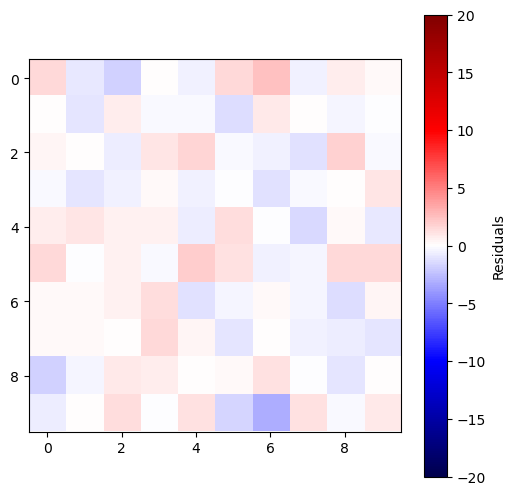

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example residual data (positive and negative values)
data = np.random.randn(10, 10)  # Random residual map

# Plot using the 'seismic' colormap
plt.figure(figsize=(6, 6))
img = plt.imshow(data, cmap='seismic', vmin=-20, vmax=20)

# Add a color bar
cbar = plt.colorbar(img)

# Set label
cbar.set_label('Residuals')

plt.savefig('/home/mroulet/Desktop/figs/colormap_res.png')
plt.show()


# FEASIBILITY RELAXATION CURVE

Label: 3
  TE: 114, Mean: 141.99, Std: 12.90
  TE: 132, Mean: 121.87, Std: 13.57
  TE: 150, Mean: 104.77, Std: 13.43
  TE: 176, Mean: 83.86, Std: 13.13
  TE: 202, Mean: 67.57, Std: 12.90
  TE: 229, Mean: 54.28, Std: 12.36
  TE: 255, Mean: 44.00, Std: 11.77
  TE: 273, Mean: 38.35, Std: 11.35
  TE: 299, Mean: 31.66, Std: 10.80
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.13081896500617685
        x: [ 3.693e+02  1.176e+02]
      nit: 13
      jac: [-3.747e-07 -9.576e-07]
     nfev: 78
     njev: 26
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


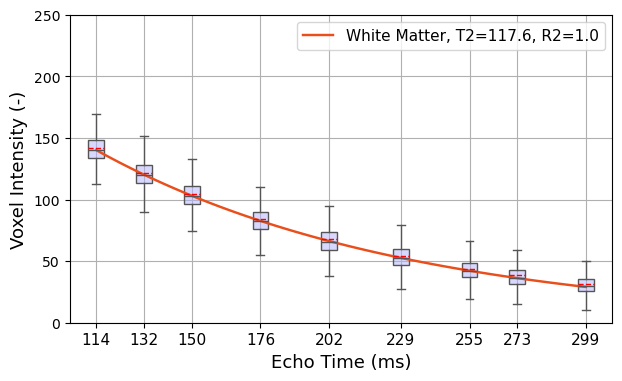

In [26]:
# Figure method relaxation curve based on recon_1,, 
import os
import nibabel as nib
import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np


from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

import statsmodels.api as sm
from scipy.optimize import minimize, differential_evolution, curve_fit

path_recon = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-003/ses-01/anat/'
path_label = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm_feta/sub-003/ses-01/anat/sub-003_ses-01_te-114_recon_1mm_feta.nii.gz'

label_array = sitk.GetArrayFromImage(sitk.ReadImage(path_label))
import os
import SimpleITK as sitk
import numpy as np

# Define the folder path
path_recon = '/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/derivatives/recon_1mm/sub-003/ses-01/anat/'

# List to store the images and their TE values
images = {}
te_values = []

# Iterate through the files in the directory
for filename in os.listdir(path_recon):
    if filename.endswith('.nii.gz') and 'sub-003_ses-01_te-' in filename:
        # Extract TE value from the filename
        te_value = int(filename.split('_te-')[1].split('_')[0])
        te_values.append(te_value)
        
        # Load the image
        image = sitk.ReadImage(os.path.join(path_recon, filename))
        image_array = sitk.GetArrayFromImage(image)
        
        # Store the image array in the dictionary with the TE value as the key
        images[te_value] = image_array



from scipy.optimize import curve_fit
# Sort TE values
te_values.sort()
# Filter for specific labels
labels_of_interest = [3]

# Initialize a dictionary to store the label and corresponding voxel values
label_dict = {}

# Iterate through each label of interest and collect the corresponding voxel values from each image
for label in labels_of_interest:
    # Find the voxel indices for the current label
    voxel_indices = np.where(label_array == label)
    
    # Collect the voxel values for each TE value
    voxel_values = {}
    for te in te_values:
        voxel_values[te] = images[te][voxel_indices]
    
    # Store the voxel values in the dictionary
    label_dict[label] = voxel_values

    # Calculate and print the mean and standard deviation for each label of interest and TE value
for label in labels_of_interest:
    print(f"Label: {label}")
    for te in te_values:
        voxels = label_dict[label][te]
        mean_val = np.mean(voxels)
        std_val = np.std(voxels)
        print(f"  TE: {te}, Mean: {mean_val:.2f}, Std: {std_val:.2f}")

scattercolors = ['#36a9e1', '#2fac66', '#e94e1b', 'red', '#9370DB']

# Define the mono-exponential function for curve fitting
def gauss_model(te, M, T2):
    return M * np.exp(-te / T2)

def gauss_obj(params, TEeffs, signal):
        k, t2 = params
        model = gauss_model(TEeffs, k, t2)
        residuals = signal - model

        return np.sum(residuals**2) / len(signal)

# Create the plot
fig, axs = plt.subplots(figsize=(7, 4))
boxcol = '#555555'
colors = ['#e94e1b','#2fac66']
rois = ['White Matter']


for i, label in enumerate(labels_of_interest):
    vx_med = []
    TEs = []

    for te in te_values:
        data = label_dict[label][te]
        bplot = axs.boxplot(data, positions=[te], showfliers=False, widths=6, patch_artist=True,
                            boxprops=dict(edgecolor=boxcol), whiskerprops=dict(color=boxcol),
                            medianprops=dict(color=boxcol), capprops=dict(color=boxcol),
                            meanline=True, showmeans=True, meanprops=dict(color='red'))
        
        for patch in bplot['boxes']:
            patch.set_facecolor((0.7, 0.7, 1, 0.5))
        
        vx_med.append(np.median(data))
        TEs.append(te)

    TEs = np.array(TEs)
    vx_med = np.array(vx_med)
    
    # Initial guesses for M, T2, and C
    initial_guess = [400, 200, 5]
    
    # Perform curve fitting
    #params, covariance = curve_fit(mono_exp, TEs, vx_med, p0=initial_guess, bounds=([0, 10, 5], [40000, 4000, 20]))

    fit_params =    {   "initial_guess": [630, 165],
                                "param_bounds": [(vx_med[0],10000),(10,600)],
                                "solver": "L-BFGS-B",
                                "options": {
                                    #"gtol": 1e-16,
                                    "ftol": 1e-6,
                                    "maxls": 50,
                                    #"maxiter": 1000,
                                    "disp": False
                                }
                            }

    result = minimize(gauss_obj, 
                          fit_params['initial_guess'], 
                          args=(TEs, vx_med),
                          method = fit_params['solver'], 
                          bounds=fit_params['param_bounds'],
                          options=fit_params['options'])
    print(result)
    # Compute R2
    fitted_values = gauss_model(TEs, *result.x)
    residuals = vx_med - fitted_values
    total_sum_squares = np.sum((vx_med - np.median(vx_med))**2)
    sum_squares_residuals = np.sum(residuals**2)
    r_squared = np.round(1 - (sum_squares_residuals / total_sum_squares), 5)

    # Plot the fitted curve
    x = np.linspace(min(te_values), max(te_values), 100)
    y = gauss_model(x, *result.x)
    
    axs.set_ylabel('Voxel Intensity (-)', fontsize=13)
    axs.set_xlabel('Echo Time (ms)', fontsize=13)
    axs.set_xticks(te_values)
    axs.set_xticklabels([str(te) for te in te_values],fontsize=11)
    axs.grid(True, zorder=0)
    axs.set_xlim([min(te_values) - 10, max(te_values) + 10])
    axs.set_ylim([-50, max(vx_med) + 200])
    axs.plot(x, y, linestyle='-', color=colors[i], alpha=1, linewidth='1.75',
             label=f"{rois[i]}, T2={np.round(result.x[1], 1)}, R2={np.round(r_squared, 2)}")
    axs.legend(loc='upper right', fontsize=11)
    axs.set_ylim([0,250])

plt.savefig('/home/mroulet/Documents/Data/qMRI/CHUV/freemax/projects/prj-004/ada/figures/relax_curve_gm.pdf',transparent=True)
plt.show()


